In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
human_data = pd.read_table('human_data.txt')

In [3]:
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [7]:
len(human_data.loc[0,'sequence'])

207

In [8]:
chime_data = pd.read_table('chimp_data.txt')

dog_data = pd.read_table('dog_data.txt')

In [9]:
chime_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [10]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [11]:
human_data['class'].value_counts()

6    1343
4     711
3     672
1     534
0     531
2     349
5     240
Name: class, dtype: int64

In [12]:
### DNA Sequencing ###  ###k-mer counting###
def get_k_mer(sequence,  size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [16]:
human_data['words'] = human_data['sequence'].apply(lambda x : get_k_mer(x))
human_data.drop('sequence', axis = 1, inplace = True)

In [18]:
###Chime Data
chime_data['words'] = chime_data['sequence'].apply(lambda x : get_k_mer(x))
chime_data.drop('sequence', axis = 1, inplace = True)

In [19]:
###Dog data
dog_data['words'] = dog_data['sequence'].apply(lambda x : get_k_mer(x))
dog_data.drop('sequence', axis = 1, inplace = True)

In [20]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [23]:
len(human_data.loc[0, 'words'])

202

In [26]:
human_text = list(human_data['words'])

for item in range(len(human_text)):
    
    human_text[item] = ' '.join(human_text[item])
    
y_data = human_data['class'].values

In [28]:
human_text[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [29]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [30]:
####Performing same process for chimpanzee and dog
chime_text = list(chime_data['words'])

for item in range(len(chime_text)):
    
    chime_text[item] = ' '.join(chime_text[item])
    
y_data_chime = chime_data['class'].values
##____________________________________________##
dog_text = list(dog_data['words'])

for item in range(len(dog_text)):
    
    dog_text[item] = ' '.join(dog_text[item])
    
y_data_dog = dog_data['class'].values

In [31]:
chime_text[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaa

In [32]:
dog_text[0]

'atgcca tgccac gccaca ccacag cacagc acagct cagcta agctag gctaga ctagat tagata agatac gataca atacat tacatc acatcc catcca atccac tccacc ccacct cacctg acctga cctgat ctgatt tgattt gattta atttat tttatt ttatta tattat attata ttataa tataat ataatc taatct aatctt atcttt tctttt cttttc ttttca tttcaa ttcaat tcaata caatat aatatt atattt tatttc atttct tttctc ttctca tctcac ctcacc tcaccc caccct accctc ccctct cctctt ctcttc tcttca cttcat ttcatc tcatcc catcct atccta tcctat cctatt ctattt tatttc atttca tttcaa ttcaac tcaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaatt aaattt aatttc atttca tttcaa ttcaaa tcaaat caaatc aaatca aatcac atcact tcacta cactac actact ctacta tactac actacc ctaccc taccca acccag cccaga ccagaa cagaaa agaaaa gaaaac aaaacc aaaccc aacccg acccga cccgat ccgata cgataa gataac ataacc taacca aaccaa accaaa ccaaat caaatc aaatct aatctg atctgc tctgct ctgcta tgctaa gctaaa ctaaaa taaaat aaaatt aaattg aattgc attgct ttgctg tgctgg gctggt ctggtc tggtca ggtcaa gtcaac tcaaca caacat aacata acataa cataat ataat

In [33]:
##Bag of words using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [34]:
cv = CountVectorizer(ngram_range=(4,4))
X_human = cv.fit_transform(human_text)

X_chimp = cv.transform(chime_text)

X_dog = cv.transform(dog_text)

In [35]:
print(X_human.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


<AxesSubplot:>

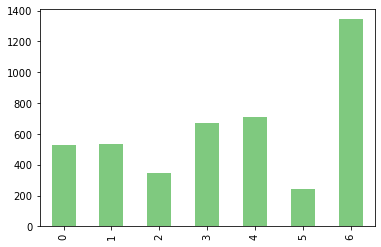

In [42]:
human_data['class'].value_counts().sort_index().plot.bar(cmap='Accent')

In [43]:
##Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_human, y_data, test_size=0.3, random_state=123, stratify=y_data)

In [45]:
X_train.shape, X_test.shape

((3066, 232414), (1314, 232414))

In [46]:
X_train

<3066x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 3777412 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.naive_bayes import MultinomialNB

#### Modelling

In [68]:
def predictions(X_train, X_test, y_train, y_test):
    model = MultinomialNB(alpha=1)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    return test_pred

In [56]:
test_pred = predictions(X_train, X_test, y_train, y_test)

##### Metrics

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
def metrics(y_true, y_pred):
    print('Confusion Matrix \n', confusion_matrix(y_true, y_pred))
    print('\nClassification Report\n', classification_report(y_true, y_pred))

In [57]:
metrics(y_test, test_pred)

Confusion Matrix 
 [[157   0   0   0   0   0   2]
 [  0 157   0   1   0   0   2]
 [  0   0  98   0   1   0   6]
 [  1   0   0 194   5   0   2]
 [  2   0   0   0 203   0   8]
 [  0   0   0   0   0  66   6]
 [  1   0   0   0   1   0 401]]

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       1.00      0.98      0.99       160
           2       1.00      0.93      0.97       105
           3       0.99      0.96      0.98       202
           4       0.97      0.95      0.96       213
           5       1.00      0.92      0.96        72
           6       0.94      1.00      0.97       403

    accuracy                           0.97      1314
   macro avg       0.98      0.96      0.97      1314
weighted avg       0.97      0.97      0.97      1314



##### Chime DNA

In [59]:
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(X_chimp, y_data_chime, test_size=0.3, random_state=123, stratify=y_data_chime)

In [60]:
##Prediction
test_pred_chime = predictions(X_train_ch, X_test_ch, y_train_ch, y_test_ch)

In [62]:
#Metrics
metrics(y_test_ch, test_pred_chime)

Confusion Matrix 
 [[ 60   0   0   0   0   0  10]
 [  0  52   0   0   0   0   4]
 [  0   0  37   4   0   0   2]
 [  0   1   0  58   1   0   9]
 [  4   0   0   2  64   0   8]
 [  0   0   0   0   1  27   5]
 [  0   0   0   1   0   0 155]]

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.86      0.90        70
           1       0.98      0.93      0.95        56
           2       1.00      0.86      0.92        43
           3       0.89      0.84      0.87        69
           4       0.97      0.82      0.89        78
           5       1.00      0.82      0.90        33
           6       0.80      0.99      0.89       156

    accuracy                           0.90       505
   macro avg       0.94      0.87      0.90       505
weighted avg       0.91      0.90      0.90       505



##### Dog Text

In [63]:
X_train_do, X_test_do, y_train_do, y_test_do = train_test_split(X_dog, y_data_dog, test_size=0.3, random_state=123, stratify=y_data_dog)

In [69]:
#Preditions
test_pred_dog = predictions(X_train_do, X_test_do, y_train_do, y_test_do)

In [70]:
metrics(y_test_do, test_pred_dog)

Confusion Matrix 
 [[29  0  0  2  5  0  3]
 [ 3 15  0  0  1  0  3]
 [ 0  0 17  0  0  0  2]
 [ 0  0  0 13  2  3 11]
 [ 5  0  0  1 20  2 13]
 [ 0  0  0  4  2 11  1]
 [ 0  0  0  8  6  0 64]]

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        39
           1       1.00      0.68      0.81        22
           2       1.00      0.89      0.94        19
           3       0.46      0.45      0.46        29
           4       0.56      0.49      0.52        41
           5       0.69      0.61      0.65        18
           6       0.66      0.82      0.73        78

    accuracy                           0.69       246
   macro avg       0.74      0.67      0.70       246
weighted avg       0.70      0.69      0.69       246

